In [1]:
from google.cloud import firestore
from tqdm import tqdm
from google.oauth2 import service_account

from datetime import datetime, timedelta

import pandas

credentials = service_account.Credentials.from_service_account_file(
    '/home/r/sabreez-85310b072efc.json')

In [2]:
db = firestore.Client('sabreez', credentials)

In [3]:
# docs = [i for i in tqdm(db.collection('caiso').list_documents())]

In [4]:
# list_docs = []
# for doc in tqdm(docs):
#     doc_dict = doc.get().to_dict()
#     doc_dict = {k.lower(): v for k, v in doc_dict.items()}
#     list_docs.append(doc_dict)

In [5]:
# import pandas
# frame = pandas.DataFrame(list_docs)

In [6]:
# frame['datetime'] = pandas.to_datetime(frame['datetime'])
# frame = frame.set_index('datetime')

# frame

In [7]:
# frame.to_csv('data_{}.csv'.format(datetime.today().date()))
frame = pandas.read_csv('data_2020-03-27.csv'.format((datetime.today()).date()))
frame['datetime'] = pandas.to_datetime(frame['datetime'])
frame = frame.set_index('datetime')
frame

/home/r/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3050: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,batteries,large hydro,date,other,solar,nuclear,geothermal,biogas,imports,coal,...,demand,mcc,mce,mcl,mghg,lmp,demand_prediction,demand_prediction_next,solar_forecast,wind_forecast
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-01 05:00:00+00:00,28.0,3013.0,2019-03-01,0.0,0.0,1132.0,985.0,238.0,3268.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:05:00+00:00,79.0,3011.0,2019-03-01,0.0,0.0,1132.0,985.0,239.0,3422.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:10:00+00:00,53.0,3010.0,2019-03-01,0.0,0.0,1132.0,986.0,239.0,3415.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:15:00+00:00,20.0,2987.0,2019-03-01,0.0,0.0,1132.0,985.0,239.0,3428.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 05:20:00+00:00,9.0,2982.0,2019-03-01,0.0,0.0,1132.0,985.0,239.0,3376.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03 14:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23493.94,NaN,NaN,NaN
2020-04-03 15:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23069.15,NaN,NaN,NaN
2020-04-03 16:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22275.27,NaN,NaN,NaN


# Interpolate hourly values

In [8]:
frame = frame.resample(rule=timedelta(hours=1)).mean()

frame= frame.interpolate(method='time')
frame.to_csv('interpolated.csv')
frame

,batteries,large hydro,other,solar,nuclear,geothermal,biogas,imports,coal,wind,...,thermal,demand,mcc,mce,mcl,mghg,lmp,demand_prediction,solar_forecast,wind_forecast
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-01 05:00:00+00:00,26.750000,2976.000000,0.0,0.000000,1132.000000,985.250000,239.333333,3285.333333,20.000000,2771.666667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 06:00:00+00:00,-0.916667,2852.000000,0.0,0.000000,1131.750000,985.583333,241.750000,2987.666667,19.333333,2588.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 07:00:00+00:00,27.916667,2872.250000,0.0,0.000000,1131.916667,985.083333,244.333333,2972.583333,19.583333,2186.333333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 08:00:00+00:00,29.000000,2885.750000,0.0,0.000000,1131.250000,985.666667,244.500000,2991.333333,20.750000,2409.083333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-01 09:00:00+00:00,-21.083333,3354.416667,0.0,0.000000,1131.083333,985.250000,244.666667,2975.583333,20.750000,2112.416667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03 14:00:00+00:00,-24.750000,1129.333333,0.0,-34.083333,2255.250000,925.833333,215.000000,6554.416667,13.333333,3747.583333,...,1020.0,20537.0,0.632967,-0.009578,-0.003109,0.0,0.62028,23493.94,0.0,3223.58
2020-04-03 15:00:00+00:00,-24.750000,1129.333333,0.0,-34.083333,2255.250000,925.833333,215.000000,6554.416667,13.333333,3747.583333,...,1020.0,20537.0,0.632967,-0.009578,-0.003109,0.0,0.62028,23069.15,0.0,3223.58
2020-04-03 16:00:00+00:00,-24.750000,1129.333333,0.0,-34.083333,2255.250000,925.833333,215.000000,6554.416667,13.333333,3747.583333,...,1020.0,20537.0,0.632967,-0.009578,-0.003109,0.0,0.62028,22275.27,0.0,3223.58


In [9]:
frame = frame.drop(labels=['demand_prediction', 'wind_forecast', 'solar_forecast', 'thermal', 'renewables', 'solar thermal', 'hydro', 'large hydro', 'demand'], axis=1)
frame

,batteries,other,solar,nuclear,geothermal,biogas,imports,coal,wind,small hydro,biomass,natural gas,mcc,mce,mcl,mghg,lmp
datetime,,,,,,,,,,,,,,,,,
2019-03-01 05:00:00+00:00,26.750000,0.0,0.000000,1132.000000,985.250000,239.333333,3285.333333,20.000000,2771.666667,391.833333,281.500000,8708.750000,NaN,NaN,NaN,NaN,NaN
2019-03-01 06:00:00+00:00,-0.916667,0.0,0.000000,1131.750000,985.583333,241.750000,2987.666667,19.333333,2588.250000,390.333333,281.500000,8619.333333,NaN,NaN,NaN,NaN,NaN
2019-03-01 07:00:00+00:00,27.916667,0.0,0.000000,1131.916667,985.083333,244.333333,2972.583333,19.583333,2186.333333,389.000000,280.666667,8625.083333,NaN,NaN,NaN,NaN,NaN
2019-03-01 08:00:00+00:00,29.000000,0.0,0.000000,1131.250000,985.666667,244.500000,2991.333333,20.750000,2409.083333,388.500000,281.000000,8104.916667,NaN,NaN,NaN,NaN,NaN
2019-03-01 09:00:00+00:00,-21.083333,0.0,0.000000,1131.083333,985.250000,244.666667,2975.583333,20.750000,2112.416667,408.750000,284.666667,8213.250000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-03 14:00:00+00:00,-24.750000,0.0,-34.083333,2255.250000,925.833333,215.000000,6554.416667,13.333333,3747.583333,125.666667,324.750000,6412.333333,0.632967,-0.009578,-0.003109,0.0,0.62028
2020-04-03 15:00:00+00:00,-24.750000,0.0,-34.083333,2255.250000,925.833333,215.000000,6554.416667,13.333333,3747.583333,125.666667,324.750000,6412.333333,0.632967,-0.009578,-0.003109,0.0,0.62028
2020-04-03 16:00:00+00:00,-24.750000,0.0,-34.083333,2255.250000,925.833333,215.000000,6554.416667,13.333333,3747.583333,125.666667,324.750000,6412.333333,0.632967,-0.009578,-0.003109,0.0,0.62028


/home/r/.local/lib/python3.8/site-packages/pandas/core/arrays/datetimes.py:1266: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


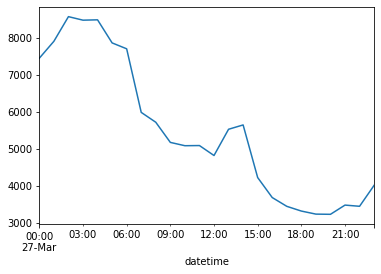

In [10]:
frame.loc['2020-03-27']['natural gas'].plot()

# Multi-step Multivariate Model

In [11]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from datetime import timedelta

In [12]:
features_considered = ['batteries', 'solar', 'nuclear', 'geothermal',
       'biogas', 'imports', 'coal', 'wind', 'small hydro', 'biomass',
       'natural gas']
features = frame[features_considered]

# features = features.resample(rule=timedelta(minutes=5)).mean()

features = features.interpolate(method='time')
features = features.fillna(method='bfill')

features = features[:datetime.today()]
features = features[(features['solar'] > 0)]

features

,batteries,solar,nuclear,geothermal,biogas,imports,coal,wind,small hydro,biomass,natural gas
datetime,,,,,,,,,,,
2019-03-01 11:00:00+00:00,54.750000,87.916667,1131.750000,986.666667,243.083333,2972.166667,21.166667,1980.500000,530.500000,281.000000,10932.833333
2019-03-01 12:00:00+00:00,-0.666667,1157.333333,1131.583333,986.000000,242.333333,3589.666667,20.833333,1755.833333,507.416667,279.833333,10716.333333
2019-03-01 13:00:00+00:00,-15.666667,3990.916667,1132.166667,984.333333,237.833333,2539.166667,19.833333,1580.833333,460.500000,280.166667,9445.666667
2019-03-01 14:00:00+00:00,0.583333,6502.500000,1132.250000,982.916667,235.166667,1847.750000,21.083333,1430.750000,405.916667,277.166667,7574.833333
2019-03-01 15:00:00+00:00,-5.666667,6975.583333,1131.916667,981.750000,235.333333,1450.750000,21.000000,1256.666667,398.416667,269.083333,7073.166667
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27 22:00:00+00:00,21.000000,6495.916667,2249.500000,927.250000,213.250000,2145.583333,18.083333,2700.750000,84.250000,337.583333,3439.000000
2020-03-27 23:00:00+00:00,37.833333,5883.666667,2246.833333,925.833333,215.666667,2949.750000,17.583333,2550.333333,119.916667,359.083333,4006.083333
2020-03-28 00:00:00+00:00,21.416667,4871.583333,2243.250000,925.750000,215.833333,4712.583333,17.416667,2275.250000,140.583333,357.916667,4719.833333


In [13]:
dataset = features.values

TRAIN_SPLIT = round(features.shape[0] * .7)


data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)
dataset = (dataset-data_mean)/data_std

dataset

array([[ 2.90368772, -1.26606443, -1.52976449, ...,  0.16265037,
        -1.0427499 ,  0.95101808],
       [ 0.11967618, -1.01046362, -1.53008812, ...,  0.12065383,
        -1.06448162,  0.90007174],
       [-0.63389085, -0.3332101 , -1.52895543, ...,  0.03529625,
        -1.05827256,  0.60106105],
       ...,
       [ 1.22909432, -0.12272235,  0.62849125, ..., -0.54674242,
         0.38999123, -0.51101243],
       [ 0.32062739, -0.80784326,  0.62768219, ..., -0.52521351,
         0.47381357, -0.22874854],
       [ 0.01501409, -1.27972781,  0.6343165 , ..., -0.52400061,
         0.42724561,  0.0354351 ]])

In [14]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i, step)
    data.append(dataset[indices])

    if single_step:
      labels.append(target[i+target_size])
    else:
      labels.append(target[i:i+target_size])

  return np.array(data), np.array(labels)

In [15]:
past_history = 24 * 7
future_target = 24 * 1

TARGET=10
STEP = 1

x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, TARGET], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, True)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, TARGET],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, True)

In [16]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (168, 11)

 Target temperature to predict : (24,)


In [17]:
BATCH_SIZE = 512
BUFFER_SIZE = 100000

train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

In [18]:
def create_time_steps(length):
  return list(range(-length, 0))

def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, TARGET]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

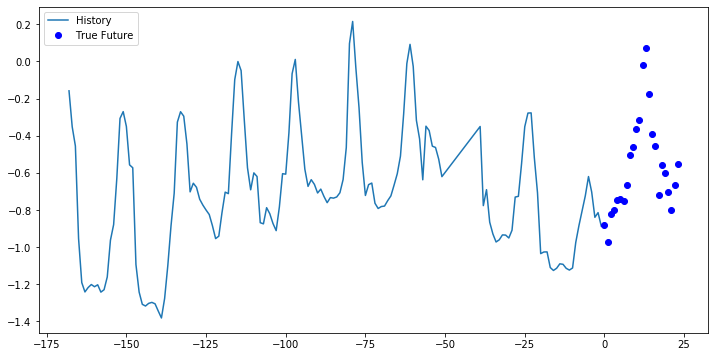

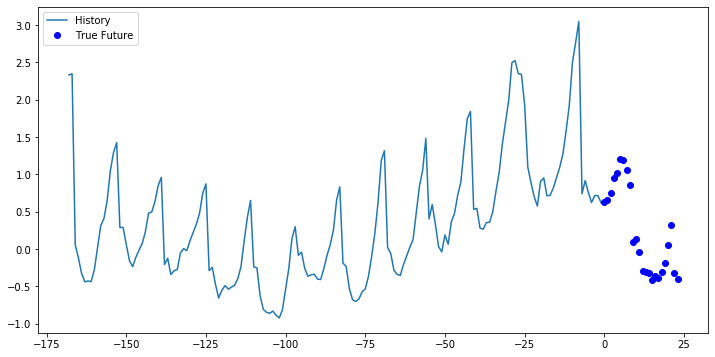

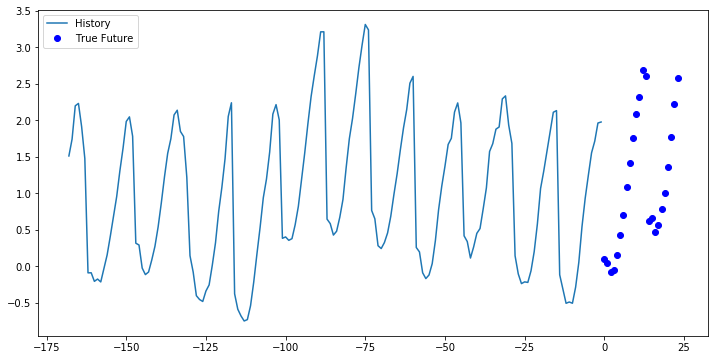

In [19]:
for x, y in train_data_multi.take(3):
  multi_step_plot(x[0], y[0], np.array([0]))

In [59]:
def gen_model(width, depth):

    multi_step_model = tf.keras.models.Sequential()
    multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
    for i in range(depth):
            multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width, return_sequences=True))
            multi_step_model.add(tf.keras.layers.Dropout(.1))

    multi_step_model.add(tf.compat.v1.keras.layers.CuDNNLSTM(width))
    multi_step_model.add(tf.keras.layers.Dense(future_target))

    multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')
    
    return multi_step_model

In [63]:
EVALUATION_INTERVAL = len(x_train_multi)
# EVALUATION_INTERVAL = 1000
VALIDATION_INTERVAL = len(x_val_multi)
# VALIDATION_INTERVAL=50
EPOCHS = 100

model = gen_model(16, 0)

model.summary()

log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

multi_step_history = model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=VALIDATION_INTERVAL,
                                          callbacks=[tensorboard_callback])

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnnlstm_14 (CuDNNLSTM)    (None, 168, 16)           1856      
_________________________________________________________________
cu_dnnlstm_15 (CuDNNLSTM)    (None, 16)                2176      
_________________________________________________________________
dense_12 (Dense)             (None, 24)                408       
Total params: 4,440
Trainable params: 4,440
Non-trainable params: 0
_________________________________________________________________
Train for 4285 steps, validate for 1716 steps
Epoch 1/100
4285/4285 [==============================] - 115s 27ms/step - loss: 0.2575 - val_loss: 0.6261
Epoch 2/100
4285/4285 [==============================] - 108s 25ms/step - loss: 0.1640 - val_loss: 0.6196
Epoch 3/100
4285/4285 [==============================] - 108s 25ms/step - loss: 0.1452 - val_loss: 0.6228
Epoch 4/100
4285/

4285/4285 [==============================] - 110s 26ms/step - loss: 0.0709 - val_loss: 0.8463
Epoch 71/100
4285/4285 [==============================] - 109s 25ms/step - loss: 0.0708 - val_loss: 0.8498
Epoch 72/100
4285/4285 [==============================] - 107s 25ms/step - loss: 0.0706 - val_loss: 0.8494
Epoch 73/100
4285/4285 [==============================] - 107s 25ms/step - loss: 0.0704 - val_loss: 0.8368
Epoch 74/100
4285/4285 [==============================] - 110s 26ms/step - loss: 0.0702 - val_loss: 0.8309
Epoch 75/100
4285/4285 [==============================] - 109s 25ms/step - loss: 0.0701 - val_loss: 0.8472
Epoch 76/100
4285/4285 [==============================] - 108s 25ms/step - loss: 0.0699 - val_loss: 0.8427
Epoch 77/100
4285/4285 [==============================] - 110s 26ms/step - loss: 0.0697 - val_loss: 0.8451
Epoch 78/100
4285/4285 [==============================] - 108s 25ms/step - loss: 0.0696 - val_loss: 0.8337
Epoch 79/100
4285/4285 [==========================

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

In [ ]:
for x, y in val_data_multi.take(5):
    multi_step_plot(x[0]* data_std[TARGET] + data_mean[TARGET], y[0]* data_std[TARGET] + data_mean[TARGET], multi_step_model.predict(x)[0]* data_std[TARGET] + data_mean[TARGET])


# Predict future

In [ ]:
predict_dataset = dataset[-(2*past_history):-past_history]
predict_dataset

In [ ]:
predict_dataset = predict_dataset.reshape([1, predict_dataset.shape[0], predict_dataset.shape[1]])

In [ ]:
predict_dataset.shape

In [ ]:
prediction = multi_step_model.predict(predict_dataset)[0]
prediction = prediction * data_std[TARGET] + data_mean[TARGET]
prediction

In [ ]:
plt.plot(prediction[:24])

In [ ]:
pred_frame = pandas.DataFrame(prediction)
pred_frame.to_csv('prediction.csv')